## Library

In [1]:
import math
import random

import numpy as np
import matplotlib.pyplot as plt

import squigglepy as sq
from squigglepy import bayes
from squigglepy.numbers import K, M, B, T

from copy import copy, deepcopy
from scipy import stats
from pprint import pprint
print('Loaded 1')

exec(open('utils.py').read())
print('Loaded 2')

exec(open('modules/tai_timelines.py').read())
print('Loaded TAI timelines module')


Loaded 1
Loaded 2
Loaded TAI timelines module


## Variables

In [2]:
tai_flop_size = sq.sample(load_cache_file='caches/meta_anchor')  # Cache generated in "Anchors" notebook
tai_flop_size = [round(t, 1) for t in tai_flop_size]
sq.get_percentiles(tai_flop_size)

{1: 22.0,
 5: 24.0,
 10: 24.8,
 20: 26.7,
 30: 29.0,
 40: 31.0,
 50: 32.9,
 60: 34.8,
 70: 37.0,
 80: 39.5,
 90: 43.1,
 95: 46.3,
 99: 52.1}

In [3]:
initial_pay = sq.sample(load_cache_file='caches/initial_pay')  # Cache generated in "Initial pay" notebook
initial_pay = [round(p, 1) for p in initial_pay]
# TODO: Suspicious this is not working in the model correctly
sq.get_percentiles(initial_pay)

{1: 7.0,
 5: 7.3,
 10: 7.4,
 20: 7.6,
 30: 7.8,
 40: 7.9,
 50: 8.0,
 60: 8.1,
 70: 8.3,
 80: 8.4,
 90: 8.7,
 95: 8.9,
 99: 9.4}

In [4]:
# Global variables - probably don't want to change these but you could.
RUNS = 40000                                      # Number of runs to do (default 10000)
CURRENT_YEAR = 2023                               # What year to start the run on? (default: 2023)
MAX_YEAR = 2123                                   # What year to end the run on? (default: 2123)
years = list(range(CURRENT_YEAR, MAX_YEAR))


def wildeford_max_gdp_frac():
    small_project = sq.lognorm(1 / (250*K), 1 / (3*K))
    modern_megaproject = sq.lognorm(1/K, 1/600)
    old_form_megaproject = sq.lognorm(1/K, 1/150)
    gigaproject = sq.lognorm(1/150, 1/50)
    
    r_ = random.random()
    if r_ < 0.1:
        gdp_frac = small_project
        percent_spent_on_compute = sq.lognorm(0.5, 0.95, lclip=0.1, rclip=0.999)
    elif r_ < 0.7:
        gdp_frac = modern_megaproject
        percent_spent_on_compute = sq.lognorm(0.7, 0.95, lclip=0.1, rclip=0.999)
    elif r_ < 0.9:
        gdp_frac = old_form_megaproject
        percent_spent_on_compute = sq.lognorm(0.85, 0.95, lclip=0.1, rclip=0.999)
    else:
        gdp_frac = gigaproject
        percent_spent_on_compute = sq.lognorm(0.85, 0.99, lclip=0.1, rclip=0.999)
        
    models_trained_per_year_for_budget = sq.lognorm(1, 10)

    return ~gdp_frac * ~percent_spent_on_compute / ~models_trained_per_year_for_budget


variables = {'initial_gdp': 23*T,
             'tai_flop_size': tai_flop_size,
             'algo_doubling_rate_max': 3,
             'algo_doubling_rate_min': 1,
             'min_reduction': 2,
             'max_reduction': 5,
             'initial_flop_per_dollar': 18.3,
             'flop_halving_rate': sq.norm(2.5, 3),       # https://epochai.org/blog/predicting-gpu-performance
             'max_flop_per_dollar': sq.lognorm(21, 24),  # https://epochai.org/blog/predicting-gpu-performance
             'initial_pay': initial_pay,
             'gdp_growth': sq.lognorm(1.01, 1.035, lclip=1.005),
             'max_gdp_frac': wildeford_max_gdp_frac, # TODO: Willingness to spend connected to commercialization
             'spend_doubling_time': sq.norm(1, 4.5, lclip=1),
             'initial_chance_of_nonscaling_issue': 0.95,
             'final_chance_of_nonscaling_issue': 0.2,
             'nonscaling_issue_bottom_year': 2040,
             'nonscaling_delay': sq.mixture([sq.lognorm(3, 10), sq.lognorm(10, 40)], weights=0.9)}

print('Loaded')


Loaded


## Run Wildeford timelines model

Deriving nonscaling delay curve...
|   iter    |  target   |   push    |   shift   |   slope   |
-------------------------------------------------------------
| 3         | -0.1268   | 6.334     | 5.658     | 0.1423    |
| 4         | -0.04604  | 0.3358    | 4.462     | 0.9985    |
| 15        | -0.01303  | 0.5098    | 3.257     | 0.3825    |
Curve params found
{'push': 0.509759695091039,
 'shift': 3.2571602751635966,
 'slope': 0.38249498765955603}
-
## RUN TIMELINES MODEL ##
Generating Bayes net with 6 cores...


40020it [03:26, 194.10it/s]                                                                                                                                                                                 

Shuffling data...
Waiting for other cores...
.

.Collecting data...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 1092.69it/s]

...Collected!
Caching in-memory...
...Cached!
Writing cache to file `caches/tai_years.sqcache`...
...Cached!
...Reducing
...Reduced!
...All done!
-
## DISTRIBUTION OF TAI ARRIVAL DATE ##
['5%: 2027',
 '10%: 2028',
 '15%: 2029',
 '20%: 2030',
 '25%: 2031',
 '35%: 2036',
 '50%: 2048',
 '60%: 2063',
 '75%: >2123',
 '80%: >2123',
 '90%: >2123',
 '95%: >2123']
-
-
## DISTRIBUTION OF RELATIVE TAI ARRIVAL DATE ##
['5%: 4 years from now',
 '10%: 5 years from now',
 '15%: 6 years from now',
 '20%: 7 years from now',
 '25%: 8 years from now',
 '35%: 13 years from now',
 '50%: 25 years from now',
 '60%: 40 years from now',
 '75%: >100 years from now',
 '80%: >100 years from now',
 '90%: >100 years from now',
 '95%: >100 years from now']
-
-
## TAI ARRIVAL DATE BY BIN ##
This year: 1.6%
2024-2027: 2.0%
2028-2029: 13.9%
2030-2034: 14.7%
2035-2039: 8.1%
2040-2049: 10.9%
2050-2059: 7.3%
2060-2069: 3.3%
2070-2079: 1.7%
2080-2089: 0.8%
2090-2099: 0.8%
2100-2109: 0.6%
2110-2119: 0.5%
>2120: 33.8%
-
## T

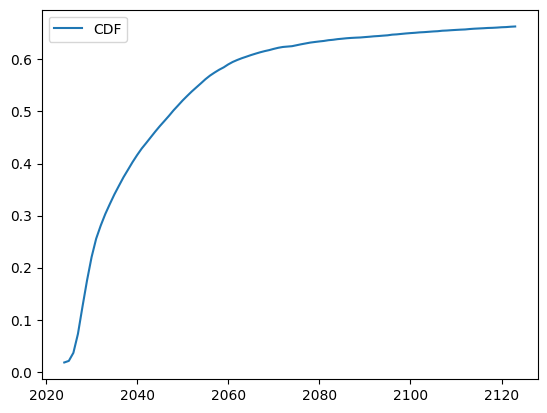

<string>:111: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
<string>:112: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#d

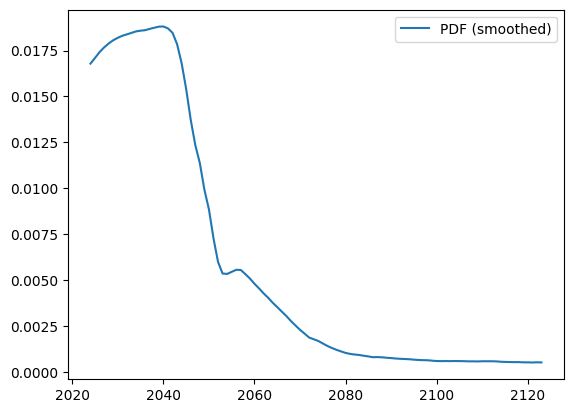

-
-
## TAI FLOP SIZE ##
{1: 22.0,
 5: 23.5,
 10: 24.4,
 20: 26.1,
 30: 28.5,
 40: 30.4,
 50: 32.2,
 60: 34.3,
 70: 36.3,
 80: 38.9,
 90: 43.0,
 95: 45.6,
 99: 51.1}


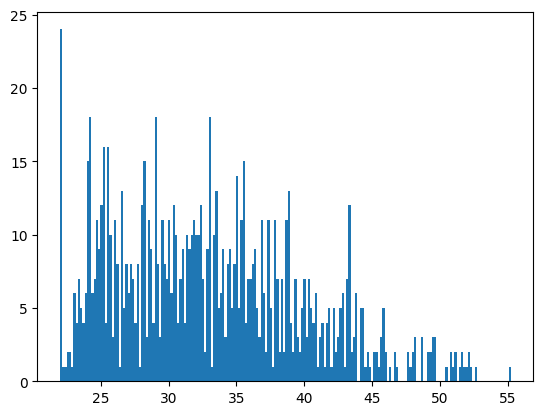

-
-
## MIN REDUCTION: 2 ##
-
## MAX REDUCTION: 5 ##
-
## MIN ALGO DOUBLING RATE: 1 ##
-
## MAX ALGO DOUBLING RATE: 3 ##
-
## INITIAL FLOP PER DOLLAR: 18.3 ##
-
## FLOP HALVING RATE ##
{1: 3.1,
 5: 3.0,
 10: 2.9,
 20: 2.9,
 30: 2.8,
 40: 2.8,
 50: 2.7,
 60: 2.7,
 70: 2.7,
 80: 2.6,
 90: 2.6,
 95: 2.5,
 99: 2.4}


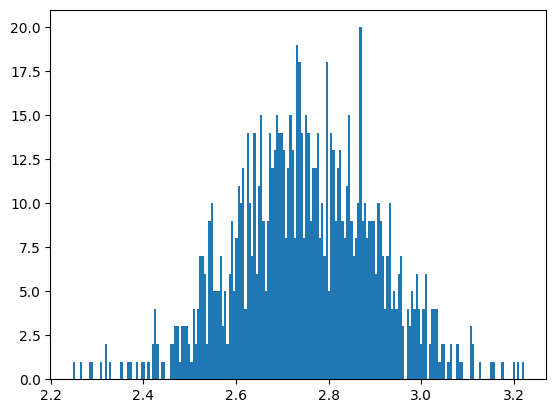

-
-
## MAX FLOP PER DOLLAR ##
{1: 20.5,
 5: 21.0,
 10: 21.3,
 20: 21.7,
 30: 21.9,
 40: 22.2,
 50: 22.4,
 60: 22.6,
 70: 22.8,
 80: 23.2,
 90: 23.6,
 95: 24.0,
 99: 24.6}


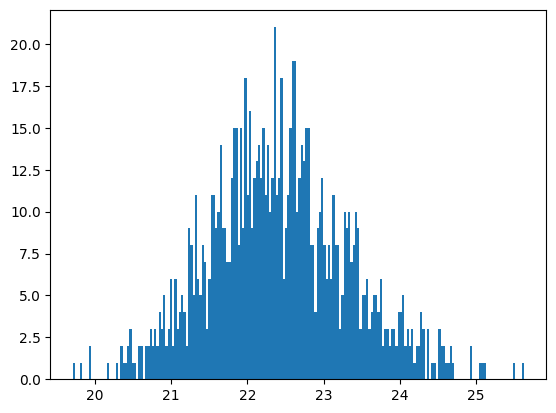

-
-
## INITIAL PAY ##
{1: 7.0,
 5: 7.3,
 10: 7.4,
 20: 7.6,
 30: 7.7,
 40: 7.8,
 50: 8.0,
 60: 8.1,
 70: 8.2,
 80: 8.4,
 90: 8.6,
 95: 8.9,
 99: 9.3}


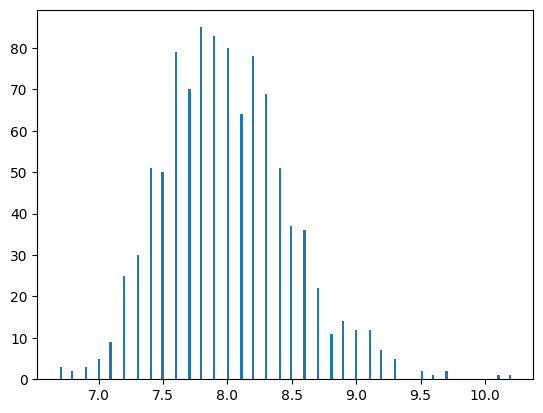

-
-
## GDP GROWTH ##
{1: 1.0,
 5: 1.01,
 10: 1.01,
 20: 1.02,
 30: 1.02,
 40: 1.02,
 50: 1.02,
 60: 1.02,
 70: 1.03,
 80: 1.03,
 90: 1.03,
 95: 1.03,
 99: 1.04}


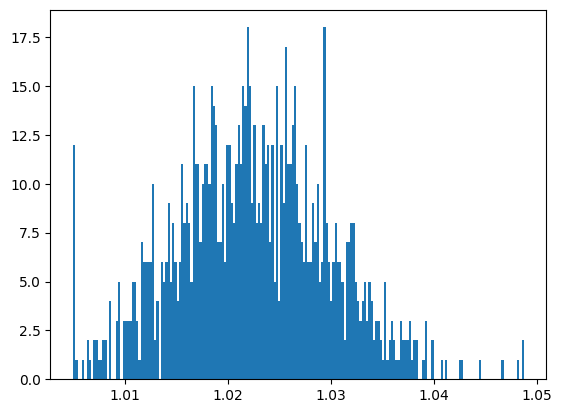

-
-
## MAX GDP FRAC ##
{1: 0.0,
 5: 1e-05,
 10: 7e-05,
 20: 0.00016,
 30: 0.00023,
 40: 0.0003,
 50: 0.00039,
 60: 0.00051,
 70: 0.00067,
 80: 0.00102,
 90: 0.00193,
 95: 0.00367,
 99: 0.01135}


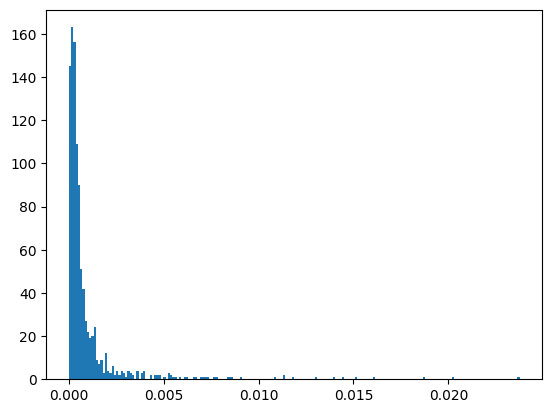

-
-
## NONSCALING DELAY ##
{1: 3,
 5: 3,
 10: 4,
 20: 4,
 30: 5,
 40: 5,
 50: 6,
 60: 7,
 70: 7,
 80: 9,
 90: 15,
 95: 22,
 99: 33}


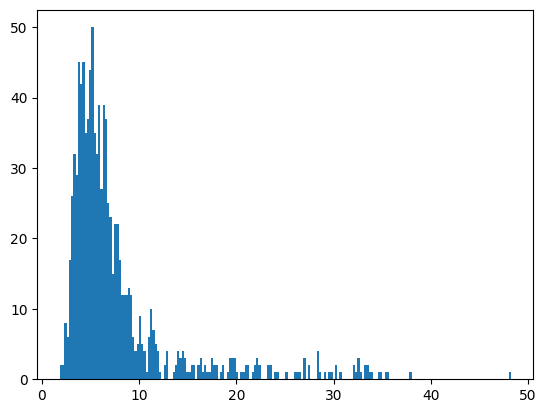

-
-
## INITIAL CHANCE OF NONSCALING ISSUE: 0.95 ##
-
## FINAL CHANCE OF NONSCALING ISSUE: 0.2 ##
-
## NONSCALING BOTTOM YEAR: 2040 ##
-
## SPEND DOUBLING TIME ##
{1: 5.1,
 5: 4.5,
 10: 4.1,
 20: 3.6,
 30: 3.3,
 40: 3.0,
 50: 2.7,
 60: 2.5,
 70: 2.2,
 80: 1.8,
 90: 1.3,
 95: 1.0,
 99: 1.0}


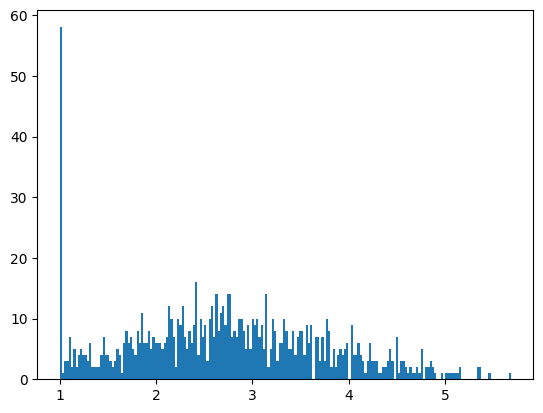

-
-
-
-
## GDP Over Time ##


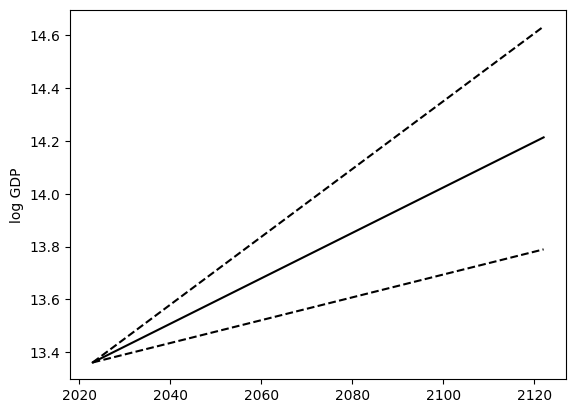

Year: 2023 - GDP log 2022$USD 13.4 (~23 trillion) 90% CI 13.4 (~23 trillion) - 13.4 (~23 trillion)
Year: 2024 - GDP log 2022$USD 13.4 (~23 trillion) 90% CI 13.4 (~23 trillion) - 13.4 (~24 trillion)
Year: 2025 - GDP log 2022$USD 13.4 (~24 trillion) 90% CI 13.4 (~23 trillion) - 13.4 (~24 trillion)
Year: 2026 - GDP log 2022$USD 13.4 (~24 trillion) 90% CI 13.4 (~24 trillion) - 13.4 (~25 trillion)
Year: 2027 - GDP log 2022$USD 13.4 (~25 trillion) 90% CI 13.4 (~24 trillion) - 13.4 (~26 trillion)
Year: 2028 - GDP log 2022$USD 13.4 (~25 trillion) 90% CI 13.4 (~24 trillion) - 13.4 (~27 trillion)
Year: 2029 - GDP log 2022$USD 13.4 (~26 trillion) 90% CI 13.4 (~24 trillion) - 13.4 (~27 trillion)
Year: 2030 - GDP log 2022$USD 13.4 (~26 trillion) 90% CI 13.4 (~25 trillion) - 13.5 (~28 trillion)
Year: 2031 - GDP log 2022$USD 13.4 (~27 trillion) 90% CI 13.4 (~25 trillion) - 13.5 (~29 trillion)
Year: 2032 - GDP log 2022$USD 13.4 (~27 trillion) 90% CI 13.4 (~25 trillion) - 13.5 (~30 trillion)
Year: 2033

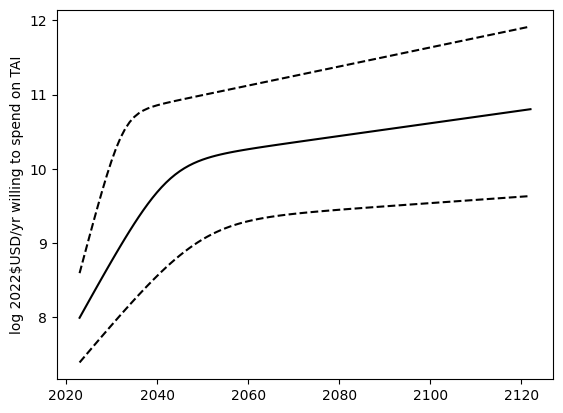

Year: 2023 - willingness log 2022$USD per year 8.0 (~99 million) 90% CI 7.4 (~25 million) - 8.6 (~395 million)
Year: 2024 - willingness log 2022$USD per year 8.1 (~127 million) 90% CI 7.5 (~29 million) - 8.8 (~669 million)
Year: 2025 - willingness log 2022$USD per year 8.2 (~164 million) 90% CI 7.5 (~34 million) - 9.1 (~1 billion)
Year: 2026 - willingness log 2022$USD per year 8.3 (~211 million) 90% CI 7.6 (~41 million) - 9.3 (~2 billion)
Year: 2027 - willingness log 2022$USD per year 8.4 (~271 million) 90% CI 7.7 (~48 million) - 9.5 (~3 billion)
Year: 2028 - willingness log 2022$USD per year 8.5 (~348 million) 90% CI 7.8 (~57 million) - 9.7 (~5 billion)
Year: 2029 - willingness log 2022$USD per year 8.6 (~446 million) 90% CI 7.8 (~67 million) - 9.9 (~8 billion)
Year: 2030 - willingness log 2022$USD per year 8.8 (~570 million) 90% CI 7.9 (~78 million) - 10.1 (~13 billion)
Year: 2031 - willingness log 2022$USD per year 8.9 (~726 million) 90% CI 8.0 (~92 million) - 10.3 (~19 billion)
Yea

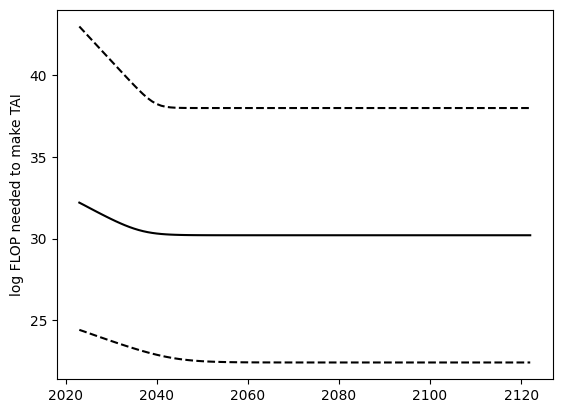

Year: 2023 - log FLOP needed for TAI 32.2 (~158 nonillion) 90% CI 24.4 (~3 septillion) - 43.0 (~10 billion decillion)
Year: 2024 - log FLOP needed for TAI 32.1 (~114 nonillion) 90% CI 24.3 (~2 septillion) - 42.7 (~5 billion decillion)
Year: 2025 - log FLOP needed for TAI 31.9 (~81 nonillion) 90% CI 24.2 (~2 septillion) - 42.4 (~3 billion decillion)
Year: 2026 - log FLOP needed for TAI 31.8 (~58 nonillion) 90% CI 24.1 (~1 septillion) - 42.1 (~1 billion decillion)
Year: 2027 - log FLOP needed for TAI 31.6 (~41 nonillion) 90% CI 24.0 (~1 septillion) - 41.8 (~625 million decillion)
Year: 2028 - log FLOP needed for TAI 31.5 (~30 nonillion) 90% CI 23.9 (~816 sextillion) - 41.5 (~313 million decillion)
Year: 2029 - log FLOP needed for TAI 31.3 (~21 nonillion) 90% CI 23.8 (~653 sextillion) - 41.2 (~156 million decillion)
Year: 2030 - log FLOP needed for TAI 31.2 (~16 nonillion) 90% CI 23.7 (~524 sextillion) - 40.9 (~78 million decillion)
Year: 2031 - log FLOP needed for TAI 31.1 (~11 nonillion

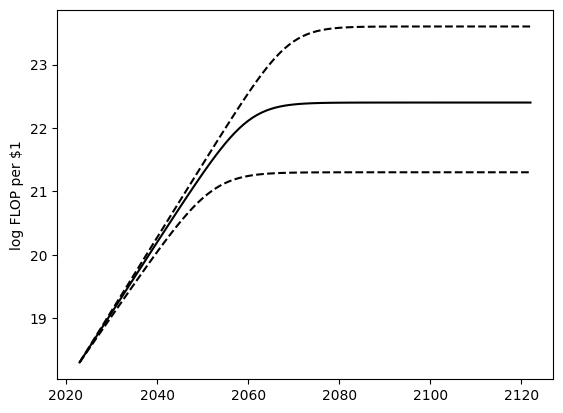

Year: 2023 - log FLOP per 2022$1USD 18.3 (~2 quintillion) 90% CI 18.3 (~2 quintillion) - 18.3 (~2 quintillion)
Year: 2024 - log FLOP per 2022$1USD 18.4 (~3 quintillion) 90% CI 18.4 (~3 quintillion) - 18.4 (~3 quintillion)
Year: 2025 - log FLOP per 2022$1USD 18.5 (~3 quintillion) 90% CI 18.5 (~3 quintillion) - 18.5 (~3 quintillion)
Year: 2026 - log FLOP per 2022$1USD 18.6 (~4 quintillion) 90% CI 18.6 (~4 quintillion) - 18.6 (~4 quintillion)
Year: 2027 - log FLOP per 2022$1USD 18.7 (~6 quintillion) 90% CI 18.7 (~5 quintillion) - 18.8 (~6 quintillion)
Year: 2028 - log FLOP per 2022$1USD 18.9 (~7 quintillion) 90% CI 18.8 (~7 quintillion) - 18.9 (~8 quintillion)
Year: 2029 - log FLOP per 2022$1USD 19.0 (~9 quintillion) 90% CI 18.9 (~8 quintillion) - 19.0 (~10 quintillion)
Year: 2030 - log FLOP per 2022$1USD 19.1 (~12 quintillion) 90% CI 19.0 (~11 quintillion) - 19.1 (~13 quintillion)
Year: 2031 - log FLOP per 2022$1USD 19.2 (~16 quintillion) 90% CI 19.1 (~13 quintillion) - 19.2 (~17 quintil

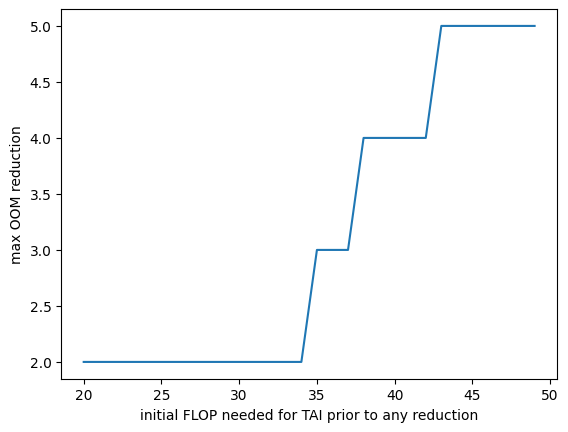

TAI log FLOP 20 -> 2.0 OOM reductions possible
TAI log FLOP 21 -> 2.0 OOM reductions possible
TAI log FLOP 22 -> 2.0 OOM reductions possible
TAI log FLOP 23 -> 2.0 OOM reductions possible
TAI log FLOP 24 -> 2.0 OOM reductions possible
TAI log FLOP 25 -> 2.0 OOM reductions possible
TAI log FLOP 26 -> 2.0 OOM reductions possible
TAI log FLOP 27 -> 2.0 OOM reductions possible
TAI log FLOP 28 -> 2.0 OOM reductions possible
TAI log FLOP 29 -> 2.0 OOM reductions possible
TAI log FLOP 30 -> 2.0 OOM reductions possible
TAI log FLOP 31 -> 2.0 OOM reductions possible
TAI log FLOP 32 -> 2.0 OOM reductions possible
TAI log FLOP 33 -> 2.0 OOM reductions possible
TAI log FLOP 34 -> 2.0 OOM reductions possible
TAI log FLOP 35 -> 3.0 OOM reductions possible
TAI log FLOP 36 -> 3.0 OOM reductions possible
TAI log FLOP 37 -> 3.0 OOM reductions possible
TAI log FLOP 38 -> 4.0 OOM reductions possible
TAI log FLOP 39 -> 4.0 OOM reductions possible
TAI log FLOP 40 -> 4.0 OOM reductions possible
TAI log FLOP 

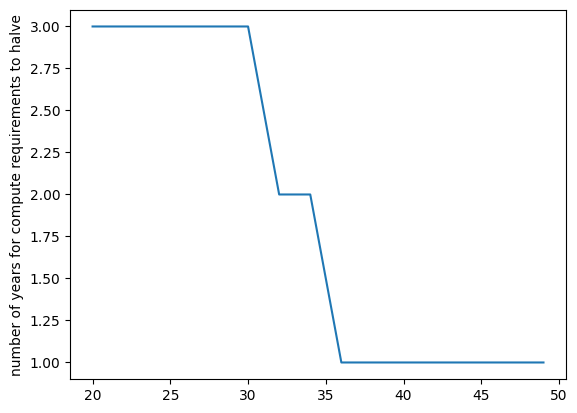

TAI log FLOP 20 -> algo doubling rate 3.0yrs
TAI log FLOP 21 -> algo doubling rate 3.0yrs
TAI log FLOP 22 -> algo doubling rate 3.0yrs
TAI log FLOP 23 -> algo doubling rate 3.0yrs
TAI log FLOP 24 -> algo doubling rate 3.0yrs
TAI log FLOP 25 -> algo doubling rate 3.0yrs
TAI log FLOP 26 -> algo doubling rate 3.0yrs
TAI log FLOP 27 -> algo doubling rate 3.0yrs
TAI log FLOP 28 -> algo doubling rate 3.0yrs
TAI log FLOP 29 -> algo doubling rate 3.0yrs
TAI log FLOP 30 -> algo doubling rate 3.0yrs
TAI log FLOP 31 -> algo doubling rate 2.5yrs
TAI log FLOP 32 -> algo doubling rate 2.0yrs
TAI log FLOP 33 -> algo doubling rate 2.0yrs
TAI log FLOP 34 -> algo doubling rate 2.0yrs
TAI log FLOP 35 -> algo doubling rate 1.5yrs
TAI log FLOP 36 -> algo doubling rate 1.0yrs
TAI log FLOP 37 -> algo doubling rate 1.0yrs
TAI log FLOP 38 -> algo doubling rate 1.0yrs
TAI log FLOP 39 -> algo doubling rate 1.0yrs
TAI log FLOP 40 -> algo doubling rate 1.0yrs
TAI log FLOP 41 -> algo doubling rate 1.0yrs
TAI log FL

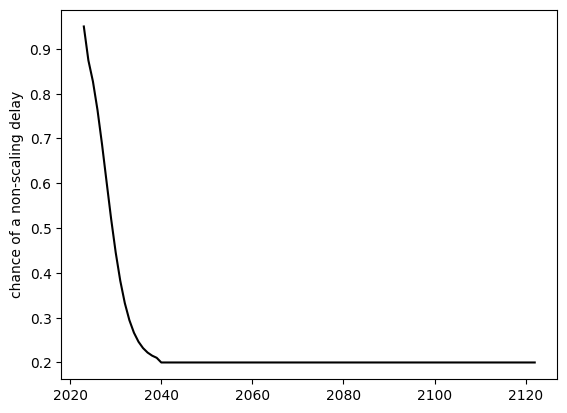

Year: 2023 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 95%
Year: 2024 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 87%
Year: 2025 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 83%
Year: 2026 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 76%
Year: 2027 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 69%
Year: 2028 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 60%
Year: 2029 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 52%
Year: 2030 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 45%
Year: 2031 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 38%
Year: 2032 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 33%
Year: 2033

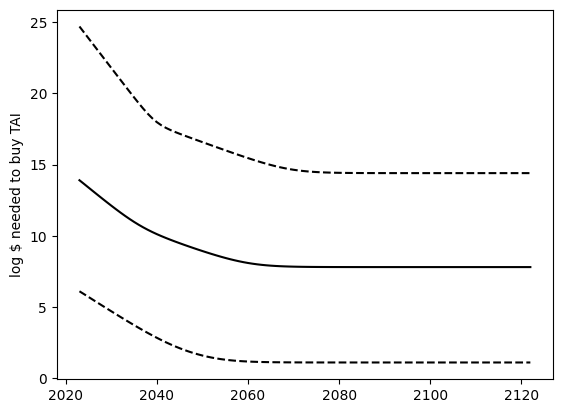

Year: 2023 - 13.9 log 2022$USD to buy TAI (~79 trillion) 90% CI 6.1 (~1 million) - 24.7 (~5 septillion)
Year: 2024 - 13.6 log 2022$USD to buy TAI (~44 trillion) 90% CI 5.9 (~798 thousand) - 24.3 (~2 septillion)
Year: 2025 - 13.4 log 2022$USD to buy TAI (~24 trillion) 90% CI 5.7 (~500 thousand) - 23.9 (~735 sextillion)
Year: 2026 - 13.1 log 2022$USD to buy TAI (~13 trillion) 90% CI 5.5 (~314 thousand) - 23.4 (~282 sextillion)
Year: 2027 - 12.9 log 2022$USD to buy TAI (~7 trillion) 90% CI 5.3 (~197 thousand) - 23.0 (~108 sextillion)
Year: 2028 - 12.6 log 2022$USD to buy TAI (~4 trillion) 90% CI 5.1 (~124 thousand) - 22.6 (~41 sextillion)
Year: 2029 - 12.4 log 2022$USD to buy TAI (~2 trillion) 90% CI 4.9 (~78 thousand) - 22.2 (~16 sextillion)
Year: 2030 - 12.1 log 2022$USD to buy TAI (~1 trillion) 90% CI 4.7 (~50 thousand) - 21.8 (~6 sextillion)
Year: 2031 - 11.9 log 2022$USD to buy TAI (~739 billion) 90% CI 4.5 (~31 thousand) - 21.4 (~2 sextillion)
Year: 2032 - 11.6 log 2022$USD to buy T

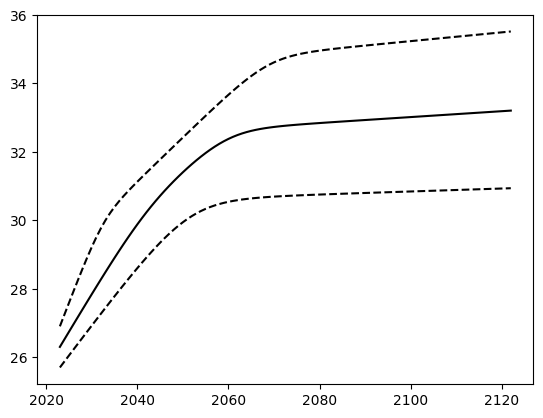

Year: 2023 - max log FLOP 26.3 (~197 septillion) 90% CI 25.7 (~49 septillion) - 26.9 (~787 septillion)
Year: 2024 - max log FLOP 26.5 (~329 septillion) 90% CI 25.9 (~74 septillion) - 27.2 (~2 octillion)
Year: 2025 - max log FLOP 26.7 (~547 septillion) 90% CI 26.0 (~111 septillion) - 27.6 (~4 octillion)
Year: 2026 - max log FLOP 27.0 (~910 septillion) 90% CI 26.2 (~166 septillion) - 27.9 (~8 octillion)
Year: 2027 - max log FLOP 27.2 (~2 octillion) 90% CI 26.4 (~248 septillion) - 28.3 (~18 octillion)
Year: 2028 - max log FLOP 27.4 (~3 octillion) 90% CI 26.6 (~371 septillion) - 28.6 (~39 octillion)
Year: 2029 - max log FLOP 27.6 (~4 octillion) 90% CI 26.7 (~555 septillion) - 28.9 (~81 octillion)
Year: 2030 - max log FLOP 27.8 (~7 octillion) 90% CI 26.9 (~828 septillion) - 29.2 (~164 octillion)
Year: 2031 - max log FLOP 28.1 (~11 octillion) 90% CI 27.1 (~1 octillion) - 29.5 (~317 octillion)
Year: 2032 - max log FLOP 28.3 (~19 octillion) 90% CI 27.3 (~2 octillion) - 29.8 (~579 octillion)
Ye

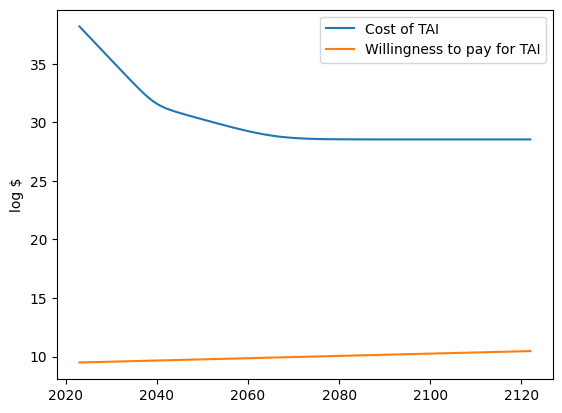

-
-
## SAMPLE RUN 2 ##
It takes 44.7 log FLOP (~501 billion decillion) for transformative capabilities.
Every 1 years algorithms get 2x better, with 5 log reductions possible.
FLOP start at a cost of 18.3 log FLOP (~2 quintillion) per 2022$USD. Every 2.5 years they get 2x cheaper, to a maximum of 22.7 log FLOP (~46 sextillion) per 2022$USD.
We are willing to pay 31.3 log 2022$USD (~20 nonillion) and this doubles every 1 years to a max of 0.000524% of GDP. GDP grows at a rate of 1.032x per year.
If a non-scaling delay happens, it will take an additional 6.8 years to produce TAI due to issues unrelated to scaling FLOP
---
Year: 2023 - 28.4 max log FLOP (24 octillion) available - TAI takes 44.7 log FLOP (501 billion decillion) - log $ 26.4 to buy TAI (251 septillion) vs. willingness to pay log $ 10.1 (12 billion) - 18.3 log FLOP per $ (2 quintillion)
Year: 2024 - 28.5 max log FLOP (33 octillion) available - TAI takes 44.4 log FLOP (251 billion decillion) - log $ 26.0 to buy TAI (95 septil

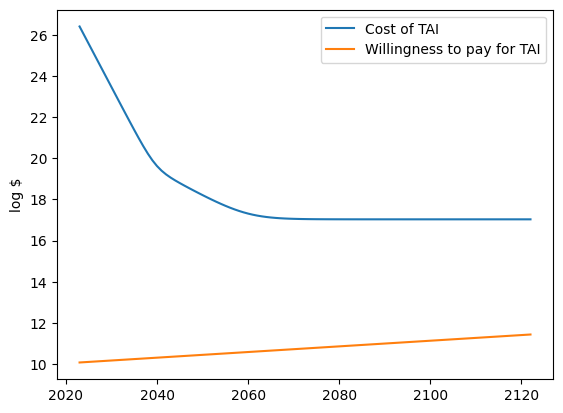

-
-
## SAMPLE RUN 3 ##
It takes 30.1 log FLOP (~1 nonillion) for transformative capabilities.
Every 2.5 years algorithms get 2x better, with 2 log reductions possible.
FLOP start at a cost of 18.3 log FLOP (~2 quintillion) per 2022$USD. Every 2.8 years they get 2x cheaper, to a maximum of 21.6 log FLOP (~4 sextillion) per 2022$USD.
We are willing to pay 35.8 log 2022$USD (~631 decillion) and this doubles every 3.0 years to a max of 0.002776% of GDP. GDP grows at a rate of 1.026x per year.
If a non-scaling delay happens, it will take an additional 7.4 years to produce TAI due to issues unrelated to scaling FLOP
---
Year: 2023 - 29.1 max log FLOP (127 octillion) available - TAI takes 30.1 log FLOP (1 nonillion) - log $ 11.8 to buy TAI (631 billion) vs. willingness to pay log $ 10.8 (64 billion) - 18.3 log FLOP per $ (2 quintillion)
Year: 2024 - 29.2 max log FLOP (167 octillion) available - TAI takes 30.0 log FLOP (967 octillion) - log $ 11.6 to buy TAI (380 billion) vs. willingness to pa

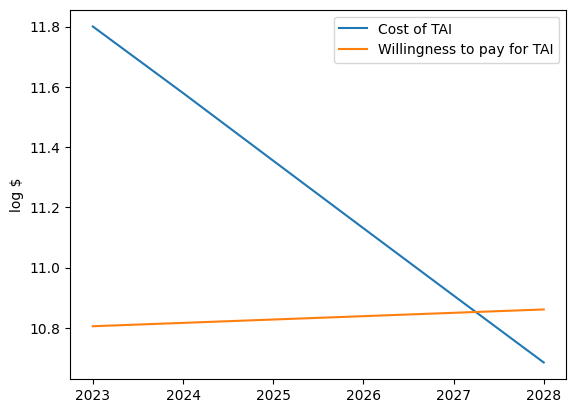

In [5]:
run_timelines_model(variables, cores=6, runs=RUNS, dump_cache_file='caches/tai_years')